<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/M2ICP4/M2ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simple CNN model for CIFAR-10
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import load_model
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.constraints import maxnorm
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_data_format('channels_first')

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# load data
(X_train1, y_train1), (X_test1, y_test1) = cifar10.load_data()

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train1.astype('float32')
X_test = X_test1.astype('float32')
X_train = X_train1 / 255.0
X_test = X_test1 / 255.0

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
num_classes

10

In [ ]:
# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:], kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 16, 16)       

In [ ]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 16, 16)       

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8316 - accuracy: 0.3252 - val_loss: 1.5131 - val_accuracy: 0.4718
Epoch 2/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4164 - accuracy: 0.4858 - val_loss: 1.2634 - val_accuracy: 0.5487
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2413 - accuracy: 0.5526 - val_loss: 1.1452 - val_accuracy: 0.5865
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1195 - accuracy: 0.5995 - val_loss: 1.0886 - val_accuracy: 0.6131
Epoch 5/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0145 - accuracy: 0.6369 - val_loss: 1.0045 - val_accuracy: 0.6453
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9307 - accuracy: 0.6690 - val_loss: 0.9246 - val_accuracy: 0.6773
Epoch 7/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8614 - accuracy: 0.6936 - val_loss: 0.8484 - val_ac

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.73%


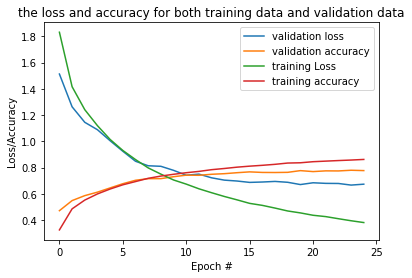

In [ ]:
plt.figure()
plt.plot(np.arange(0, 25), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 25), history.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, 25), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 25), history.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [ ]:
model.save('./model' + '.h5')

In [ ]:
import tensorflow as tf 
model2 = tf.keras.models.load_model('model.h5')

In [ ]:
for img in range(0,4):
  predict_classe = model2.predict_classes(X_test[[img],:])
  print("predicted classe for image: {" + str(img) +"} is: " + str(predict_classe))

predicted classe for image: {0} is: [5]
predicted classe for image: {1} is: [8]
predicted classe for image: {2} is: [8]
predicted classe for image: {3} is: [0]


In [ ]:
for img in range(0,4):
  print(y_test1[img])

[3]
[8]
[8]
[0]
